In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('customers.csv')
orders = pd.read_csv('orders (2).csv')
order_items = pd.read_csv('order_items.csv')
payments = pd.read_csv('payments.csv')
products = pd.read_csv('products (2).csv')

In [3]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])


In [4]:
# 1. Orders per month in 2018 (Intermediate Q1)
orders_2018 = orders[orders['order_purchase_timestamp'].dt.year == 2018]
monthly_orders = orders_2018.groupby(orders_2018['order_purchase_timestamp'].dt.month).size()

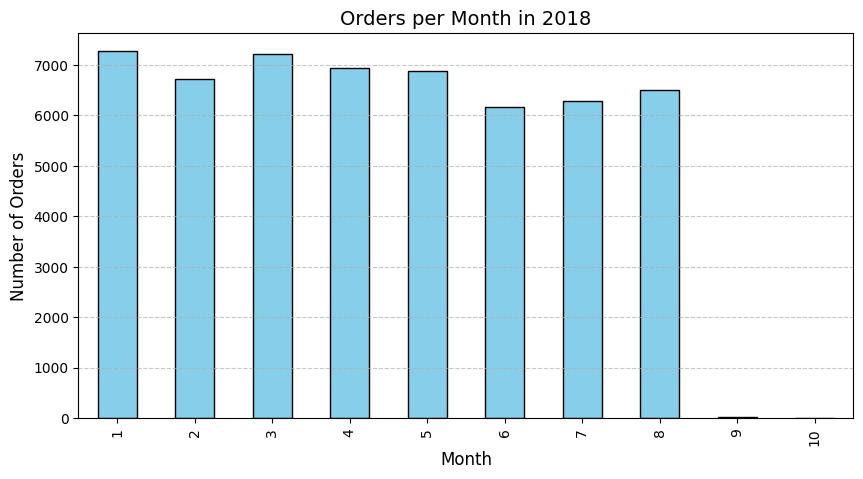

In [5]:
plt.figure(figsize=(10, 5))
monthly_orders.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Orders per Month in 2018', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('orders_monthly_2018.png')
plt.show()

In [6]:
# 2. Revenue Contribution by Category (Intermediate Q3)
cat_revenue = order_items.merge(products, on='product_id').groupby('product category')['price'].sum()
top_10_revenue = cat_revenue.sort_values(ascending=False).head(10)

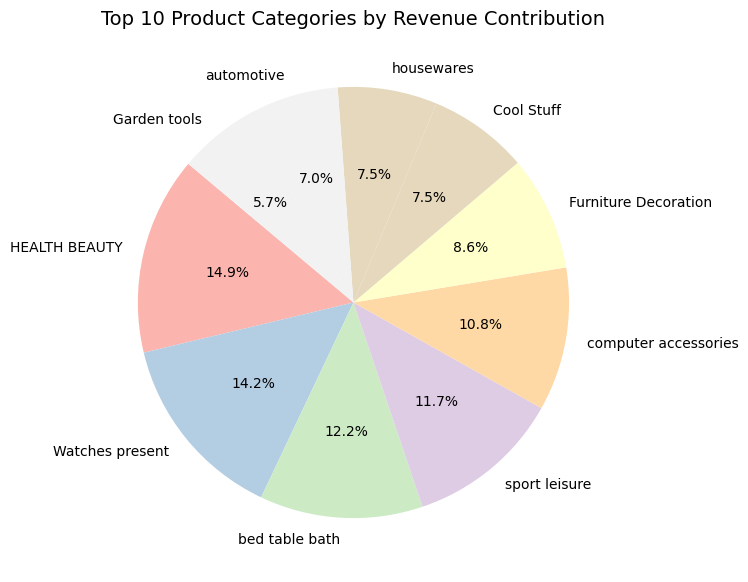

In [7]:
plt.figure(figsize=(10, 7))
top_10_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Pastel1')
plt.title('Top 10 Product Categories by Revenue Contribution', fontsize=14)
plt.ylabel('')
plt.savefig('revenue_contribution.png')
plt.show()

In [8]:
# 3. Correlation: Price vs. Popularity (Intermediate Q4)
popularity = order_items.groupby('product_id').size().reset_index(name='purchase_count')
price_vs_pop = order_items[['product_id', 'price']].drop_duplicates().merge(popularity, on='product_id')

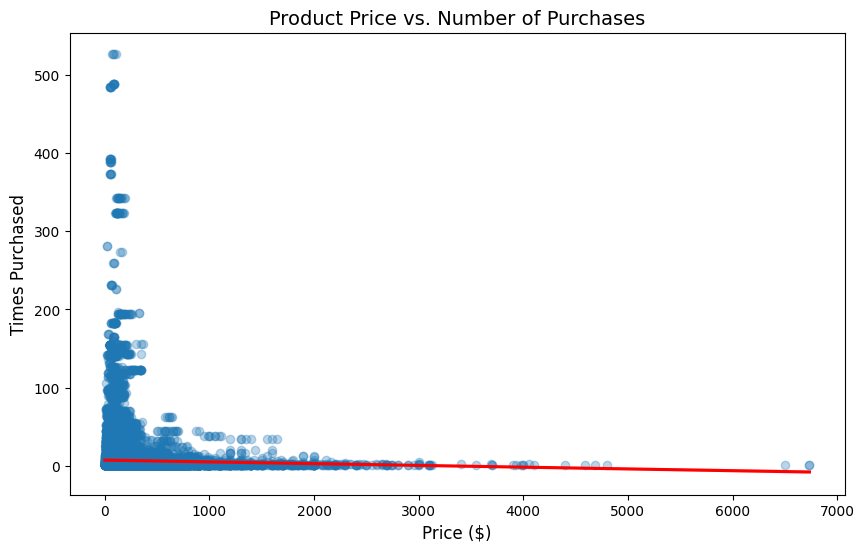

In [9]:
plt.figure(figsize=(10, 6))
sns.regplot(data=price_vs_pop, x='price', y='purchase_count', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Product Price vs. Number of Purchases', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Times Purchased', fontsize=12)
plt.savefig('correlation_plot.png')
plt.show()

In [10]:
# 4. Year-over-Year Growth (Advanced Q3)
orders['year'] = orders['order_purchase_timestamp'].dt.year
yearly_sales = orders.merge(payments, on='order_id').groupby('year')['payment_value'].sum()
yoy_growth = yearly_sales.pct_change() * 100

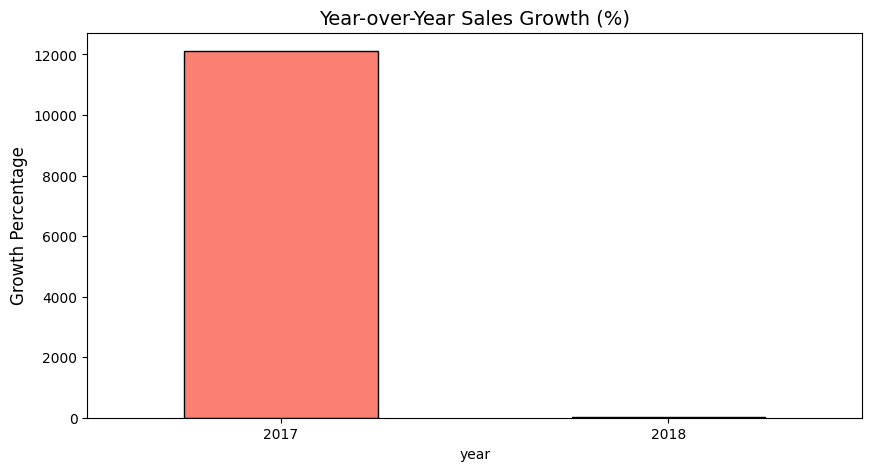

In [11]:
plt.figure(figsize=(10, 5))
yoy_growth.dropna().plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Year-over-Year Sales Growth (%)', fontsize=14)
plt.ylabel('Growth Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.savefig('yoy_growth.png')
plt.show()

In [12]:
# 5. Customer Retention Rate Calculation
merged_cust = orders.merge(customers, on='customer_id')
first_p = merged_cust.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()
first_p.columns = ['customer_unique_id', 'first_purchase']
retention = merged_cust.merge(first_p, on='customer_unique_id')
retention['diff_days'] = (retention['order_purchase_timestamp'] - retention['first_purchase']).dt.days
retained = retention[(retention['diff_days'] > 0) & (retention['diff_days'] <= 180)]['customer_unique_id'].nunique()
total_users = first_p['customer_unique_id'].nunique()
print(f"6-Month Customer Retention Rate: {(retained/total_users)*100:.2f}%")

6-Month Customer Retention Rate: 1.67%
